<a href="https://colab.research.google.com/github/alefonsecabb/Cost_of_living/blob/main/Cost_of_living.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as smi
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#pandas option to display max columns
pd.set_option('display.max_columns',None)
# Set Matplotlib defaults Style
plt.style.use('ggplot')
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10
    )
sns.set_palette('plasma', n_colors=None, desat=None, color_codes=False)
import warnings
warnings.simplefilter("ignore")

In [7]:
dados = pd.read_csv('Cost_of_Living_Index_by_Country_2024 (1).csv')

In [8]:
dados.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [5]:
dados.shape

(121, 8)

In [11]:
dados.dtypes # shows the kind of data

,0
Rank,int64
Country,object
Cost of Living Index,float64
Rent Index,float64
Cost of Living Plus Rent Index,float64
Groceries Index,float64
Restaurant Price Index,float64
Local Purchasing Power Index,float64


In [12]:
# missing values

dados.isnull().sum()

,0
Rank,0
Country,0
Cost of Living Index,0
Rent Index,0
Cost of Living Plus Rent Index,0
Groceries Index,0
Restaurant Price Index,0
Local Purchasing Power Index,0


In [13]:
# duplicated

dados.duplicated().sum()

0

In [15]:
dados.describe()
# Comments:
# - The count shows the number of non-null entries for each column.
# - The mean provides the average value for each index.
# - The std (standard deviation) indicates the dispersion of the data around the mean.
# - The min and max values help in identifying the range of data, which might highlight potential outliers.
# - The 25%, 50%, and 75% values represent the first, second (median), and third quartiles, respectively, offering insight into the data distribution.

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


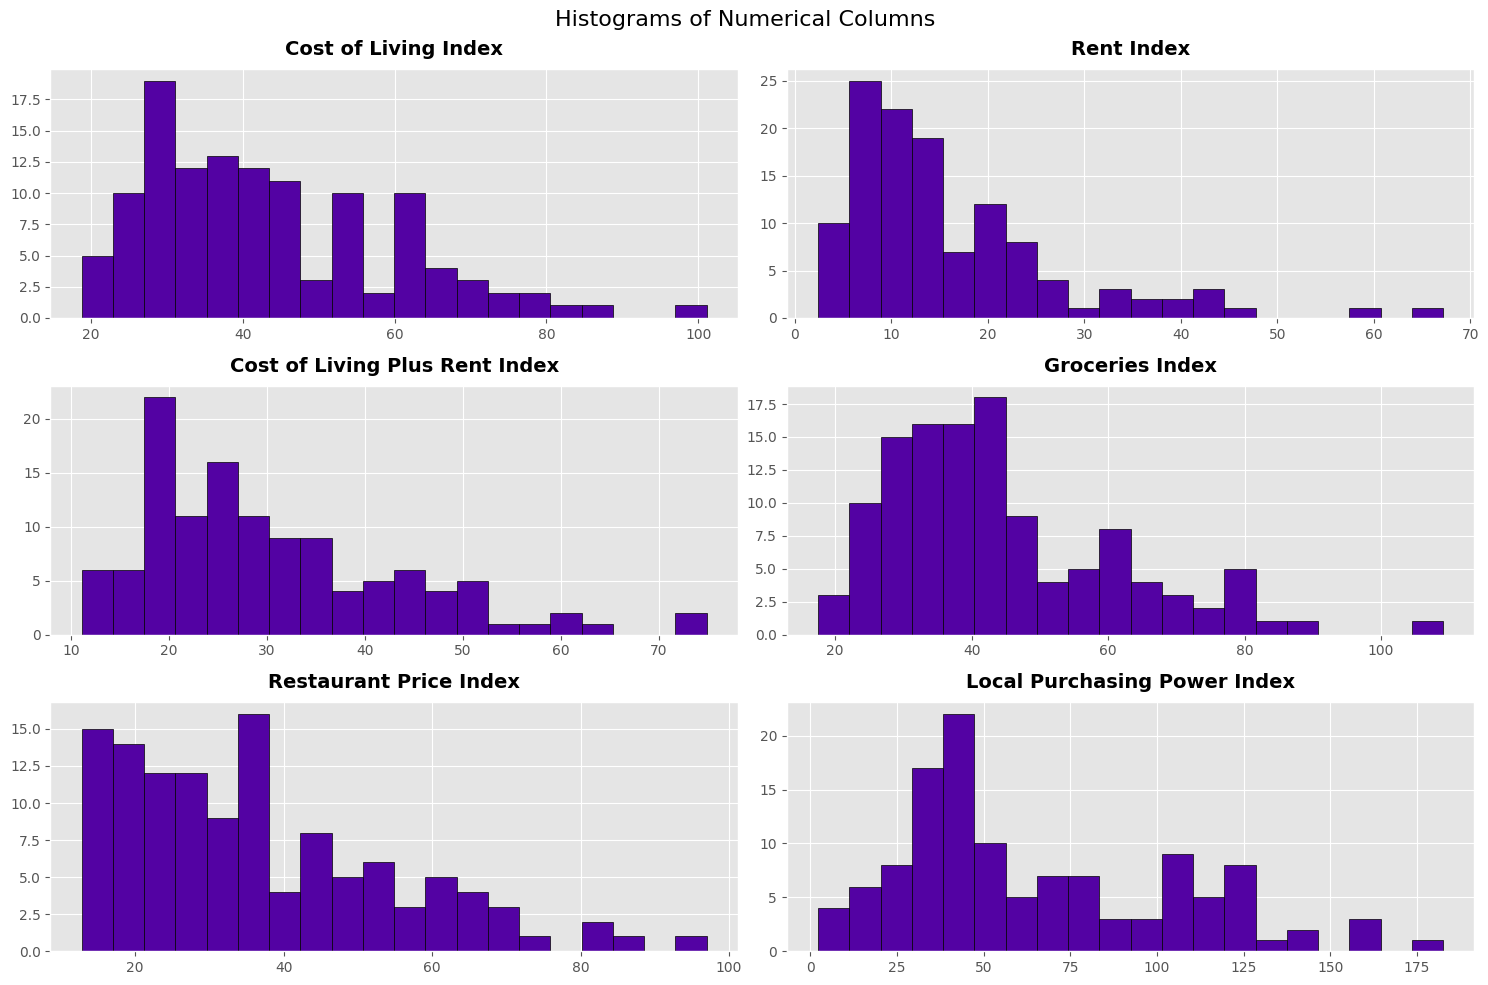

In [17]:
# Plot histograms for each numerical column
dados.iloc[:, 2:].hist(figsize=(15, 10), bins=20,edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()

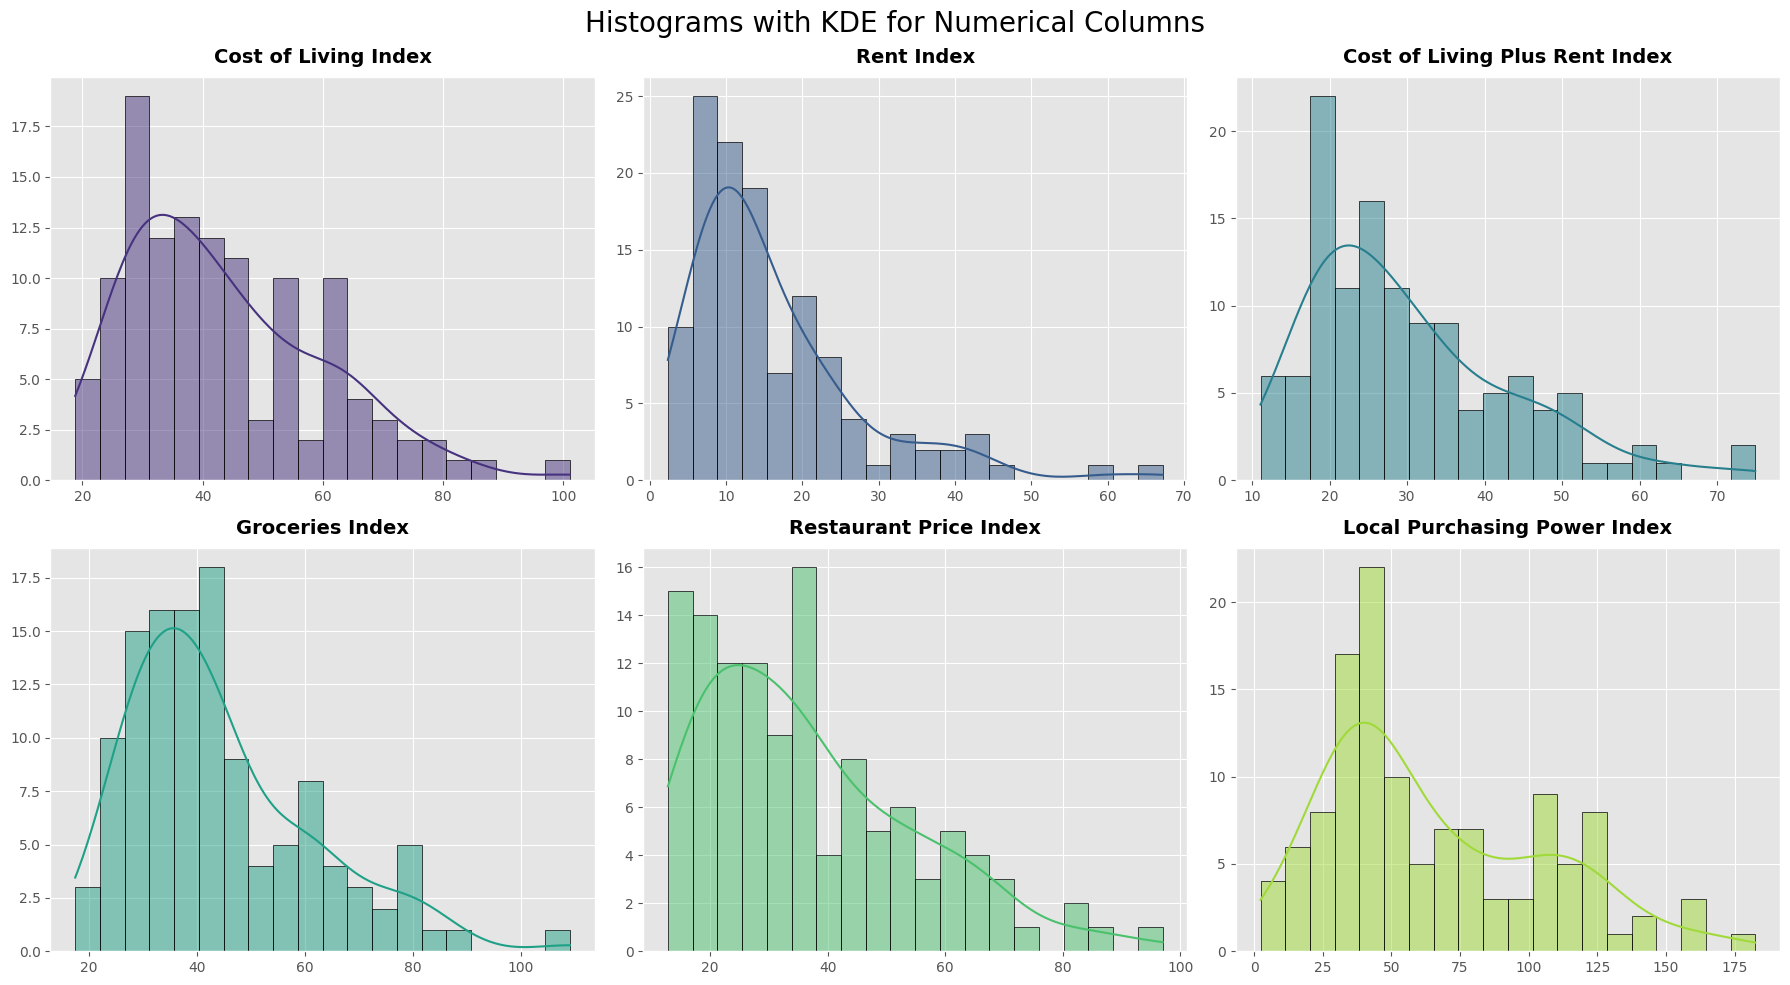

In [20]:
# Plot histograms for each numerical column using matplotlib subplots
# Set up the figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns to accommodate 6 columns
fig.suptitle('Histograms with KDE for Numerical Columns', fontsize=20)

# List of colors to use
colors = sns.color_palette('viridis', 6)

# Flatten the axes array to iterate easily
axes = axes.flatten()

# Iterate over the columns and axes to plot
for i, column in enumerate(dados.columns[2:]):
    if i < len(axes):  # Ensure we don't exceed the number of subplots
        sns.histplot(dados[column], kde=True, ax=axes[i], color=colors[i], edgecolor='black', bins=20)
        axes[i].set_title(f'{column}', fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

# Adjust layout for better spacing between plots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect parameter to prevent overlap with the suptitle
plt.show()

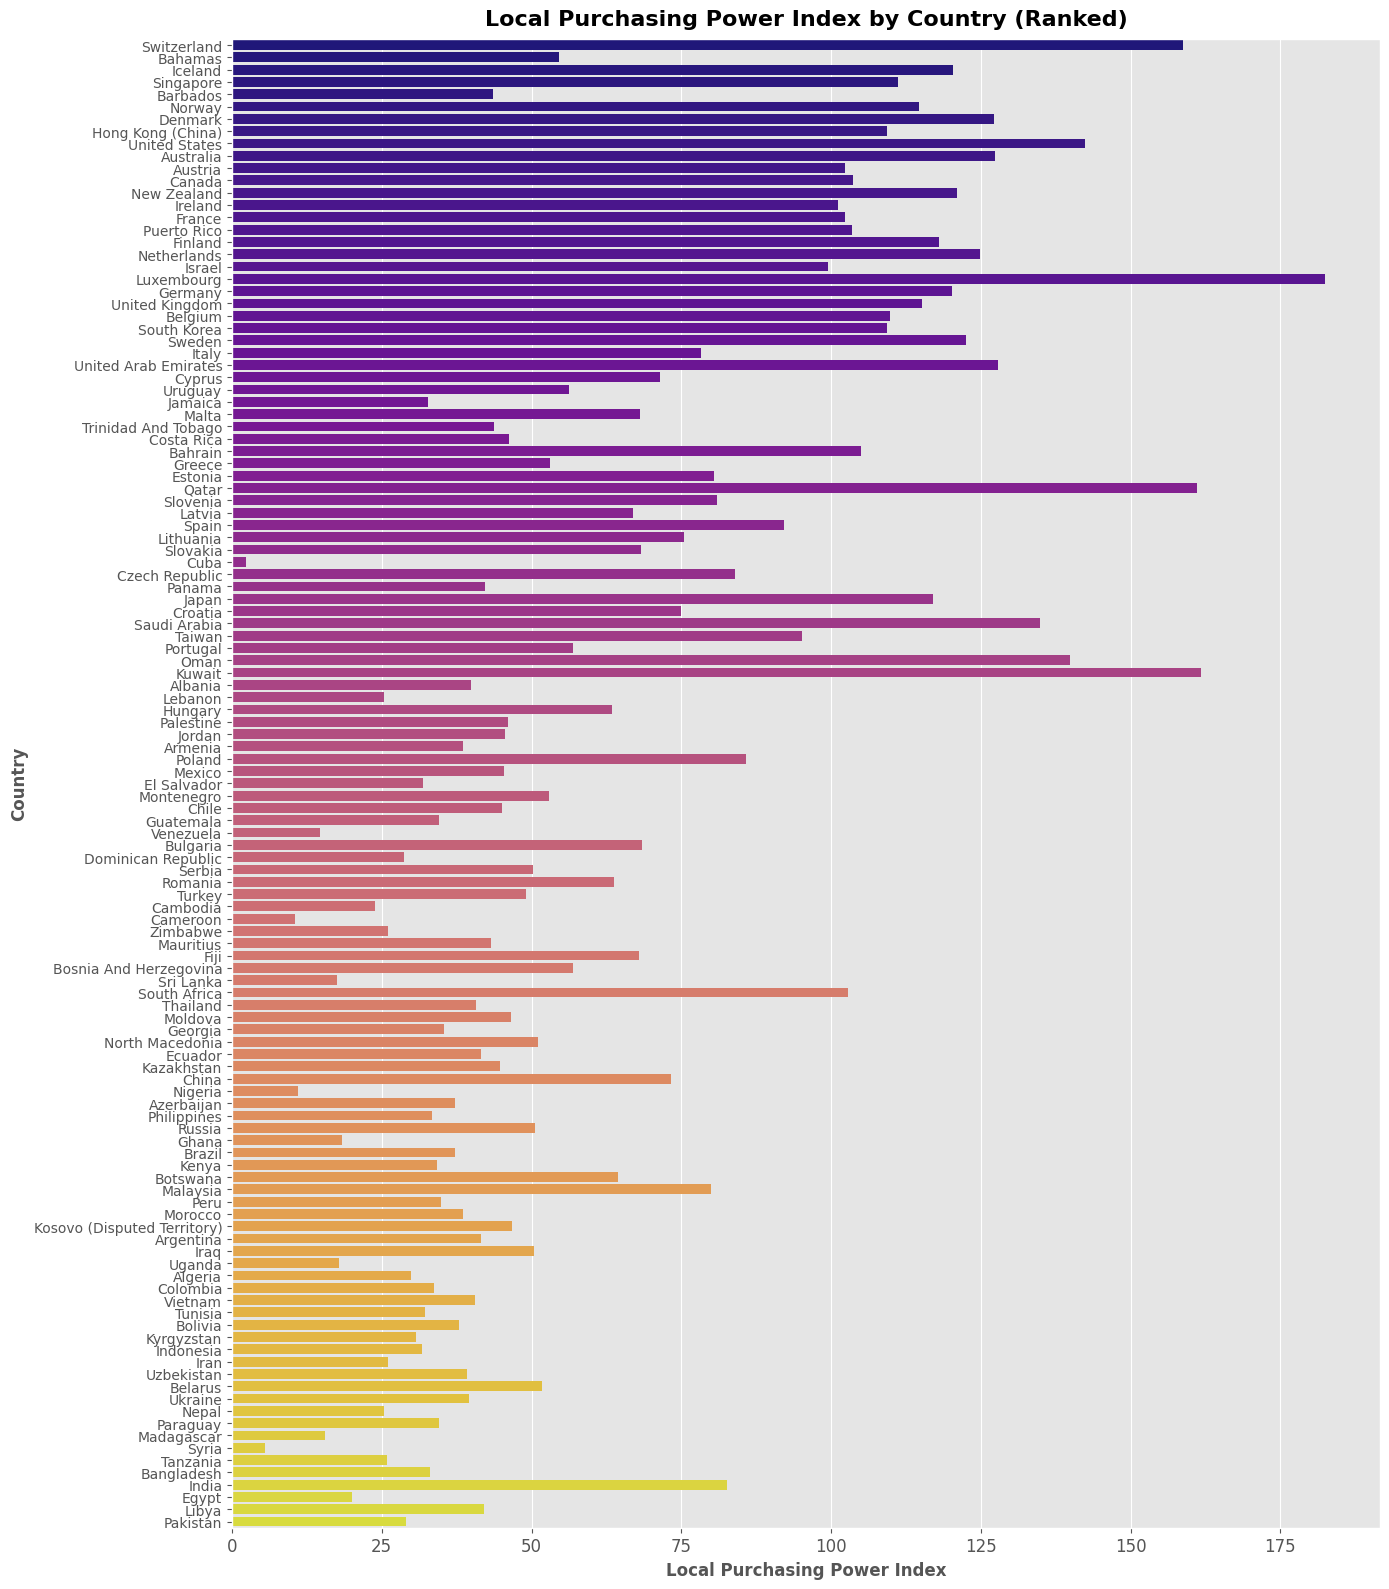

In [26]:
#Local Purchasing Power Index by Country
plt.figure(figsize=(14, 16))
sns.barplot(x='Local Purchasing Power Index', y='Country', data=dados.sort_values('Rank'), palette='plasma')
plt.title('Local Purchasing Power Index by Country (Ranked)', fontsize=16)
plt.xlabel('Local Purchasing Power Index')
plt.ylabel('Country')
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.show()

In [35]:

# Cost of Living Index Rent Index by countries using plotly.graph_objects
# Sort data by Cost of Living Index
df_sorted = dados.sort_values('Cost of Living Index', ascending=False)

# Create the figure
fig = go.Figure()

# Add Cost of Living Index bars
fig.add_trace(go.Bar(
    y=df_sorted['Country'],
    x=df_sorted['Cost of Living Index'],
    name='Cost of Living Index',
    orientation='h',
    marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1.5)),
    opacity=0.6
))

# Add Rent Index bars
fig.add_trace(go.Bar(
    y=df_sorted['Country'],
    x=df_sorted['Rent Index'],
    name='Rent Index',
    orientation='h',
    marker=dict(color='rgb(255,127,14)', line=dict(color='rgb(8,48,107)', width=1.5)),
    opacity=0.6
))

# Update layout
fig.update_layout(
    title='Cost of Living Index vs Rent Index by Country',
    xaxis_title='Index',
    yaxis_title='Country',
    yaxis=dict(showgrid=False, showline=False, showticklabels=True),
    barmode='overlay',  # You can switch to 'group' if you prefer side-by-side bars
    legend=dict(x=0.8, y=1.0),
    height=2000  # Increase height for readability
)

# Show the plot
fig.show()

'''Key Insight:

This graph compares the Cost of Living Index and Rent Index across countries, ranked by the Cost of Living Index.

Switzerland and Iceland are the most expensive overall, with both high living and rent costs.
Barbados has a high cost of living but a moderate rent index, indicating expensive non-housing expenses.
Pakistan, Egypt, and Bangladesh are among the most affordable, with low indices in both categories.
Countries like the United States and Germany show higher rent costs relative to their overall living costs, suggesting rent significantly drives the expense in these regions.'''

'Key Insight:\n\nThis graph compares the Cost of Living Index and Rent Index across countries, ranked by the Cost of Living Index.\n\nSwitzerland and Iceland are the most expensive overall, with both high living and rent costs.\nBarbados has a high cost of living but a moderate rent index, indicating expensive non-housing expenses.\nPakistan, Egypt, and Bangladesh are among the most affordable, with low indices in both categories.\nCountries like the United States and Germany show higher rent costs relative to their overall living costs, suggesting rent significantly drives the expense in these regions.'

In [36]:
# Choropleth map of Cost of Living Index
fig = px.choropleth(dados,
                    locations="Country",
                    locationmode='country names',
                    color="Cost of Living Index",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

# Update layout with larger size
fig.update_layout(title_text='Global Cost of Living Index by Country',
                  title_x=0.5,
                  width=1000,  # Adjust the width
                  height=800,  # Adjust the height
                  plot_bgcolor='rgba(128, 128, 128, 1)'
                 )
fig.show()

In [38]:
# Create the scatter plot for Cost of Living Index vs Local Purchasing Power Index
fig = px.scatter(dados,
                 x='Cost of Living Index',
                 y='Local Purchasing Power Index',
                 text='Country',
                 color='Rent Index',  # Adding color based on Rent Index
                 size='Cost of Living Plus Rent Index',  # Size of points based on another index
                 hover_name='Country',
                 title='Cost of Living Index vs Local Purchasing Power Index',
                 labels={'Cost of Living Index':'Cost of Living Index',
                         'Local Purchasing Power Index':'Local Purchasing Power Index'})

# Customize the layout
fig.update_traces(textposition='top center')
fig.update_layout(height=800,
                  title_x=0.5,
                  xaxis=dict(showgrid=True),
                  yaxis=dict(showgrid=True),
                  template='plotly')

# Show the plot
fig.show()

'''Key Insight:

This scatter plot shows the relationship between the Cost of Living Index and the Local Purchasing Power Index across countries.

Switzerland and Luxembourg have high costs of living but also high purchasing power, indicating strong economies.
Bahamas and Barbados have high costs of living with lower purchasing power, suggesting higher financial pressure on residents.
Countries like India and Syria have low costs of living but also very low purchasing power, reflecting lower economic strength.
Rent Index adds another layer of insight, with countries like United States and Hong Kong showing higher rent costs relative to their overall living conditions.'''

'Key Insight:\n\nThis scatter plot shows the relationship between the Cost of Living Index and the Local Purchasing Power Index across countries.\n\nSwitzerland and Luxembourg have high costs of living but also high purchasing power, indicating strong economies.\nBahamas and Barbados have high costs of living with lower purchasing power, suggesting higher financial pressure on residents.\nCountries like India and Syria have low costs of living but also very low purchasing power, reflecting lower economic strength.\nRent Index adds another layer of insight, with countries like United States and Hong Kong showing higher rent costs relative to their overall living conditions.'

In [39]:
# Create the new variable: Adjusted Cost of Living Index (Excluding Rent)
'''
This ratio adjusts the Cost of Living Index by subtracting the Rent Index, providing a clearer view of the cost of living excluding the
influence of rent. This is particularly useful for comparing countries where rent might disproportionately affect the overall cost of living
'''


dados['Adjusted Cost of Living Index'] = dados['Cost of Living Index'] - dados['Rent Index']



fig = px.bar(dados.sort_values('Adjusted Cost of Living Index', ascending=False),
             x='Country',
             y='Adjusted Cost of Living Index',
             color='Adjusted Cost of Living Index',
             title='Adjusted Cost of Living Index (Excluding Rent) by Country',
             labels={'Adjusted Cost of Living Index':'Adjusted Cost of Living Index'},
             color_continuous_scale=px.colors.sequential.Plasma)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Adjusted Cost of Living Index (Excluding Rent)',
    xaxis={'categoryorder':'total descending'},
    template='plotly',
    height=600
)

fig.show()
